# **Random Graph Creation**


## Importing the library

In [2]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# Cargar el grafo desde el archivo GraphML
gestion = nx.read_graphml('gestion.graphml')

In [63]:
print(len(gestion.nodes()))
print(len(gestion.edges()))

1891
21864


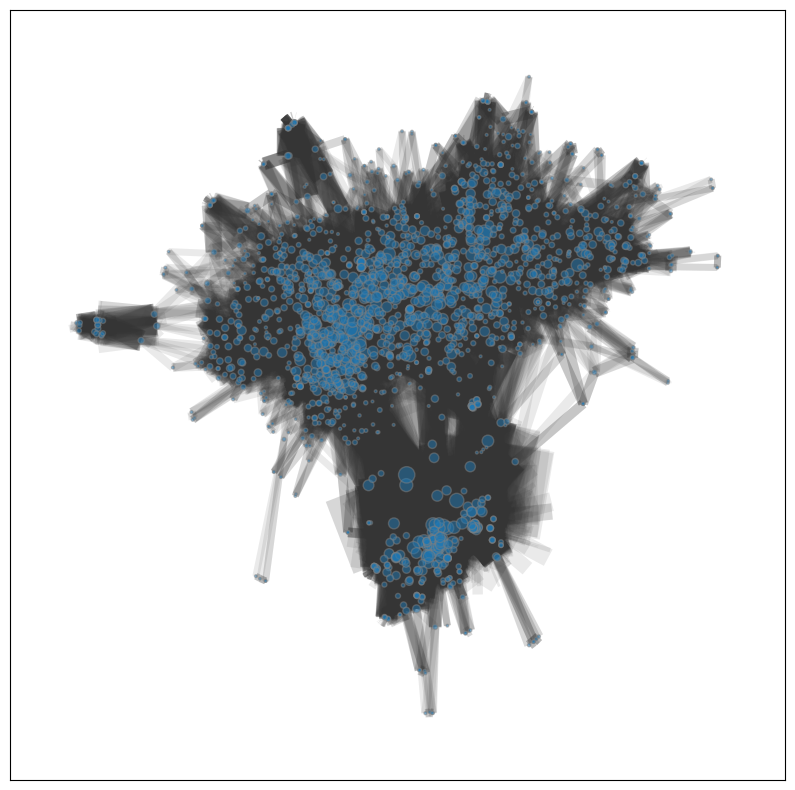

In [34]:
# Dibujar el grafo
plt.figure(figsize=(10,10))
pos = nx.spring_layout(gestion,seed=30)

# Dibujar los pesos
pesos = nx.get_edge_attributes(gestion, 'peso')
pesos_lista = [(pesos[e]) for e in gestion.edges()]

nx.draw_networkx_edges(gestion,pos,alpha=0.1,width=pesos_lista, edge_color='#353535')

# Obtener el grado de cada nodo
degrees = dict(gestion.degree)
nx.draw_networkx_nodes(gestion,pos,node_size=[v * 1 for v in degrees.values()],alpha=0.5,edgecolors="grey")

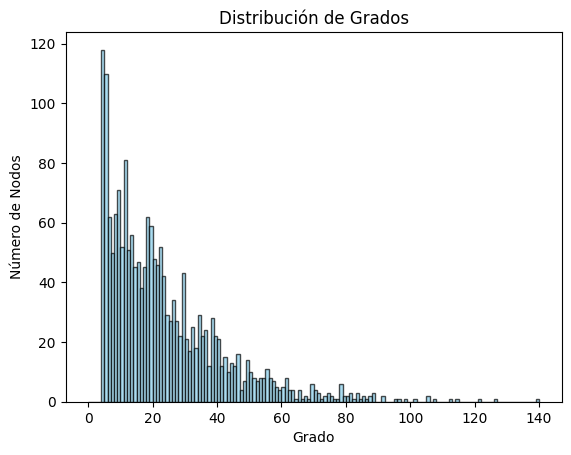

In [73]:
# 3. Calcular la distribución de grados
degree_sequence = [d for n, d in gestion.degree()]
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Número de Nodos")
plt.show()

Podemos identificar que hay nodos con un grado alto en el grafo podrian representar sesiones de usuarios que han interactuado con muchas noticias.

Podemos análizar patrones de lectura: Comprender mejor los hábitos de lectura de tus usuarios y a identificar patrones de interacción con el contenido del sitio web.

Segmentación de usuarios: Una distribución de grados sesgada podría indicar diferentes tipos de usuarios o comportamientos de lectura.

Identificación de noticias populares: Los nodos con un alto grado de entrada (es decir, que muchas sesiones los visitaron) podrían representar noticias populares o de interés general. Esto podría ayudarte a identificar qué contenido es más atractivo para tus usuarios y a tomar decisiones sobre la presentación o promoción de noticias.

In [68]:
from itertools import combinations
from random import random


# Funcion que retorna un grafo aleatorio
def ER(n, p):
    #Se crea un conjunto de vertices segun el n como parametro
    V = set([v for v in range(n)])
    E = set()
    #Se crean las aristas solo si el num random contenido en a es menor que p
    #eso garantiza que las aristas se crearan de forma aleatoria entre dos vertices
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g

In [50]:
#recuperar 10 nodos () aleatorios
#Lista de nodos del grafo
nodos_of = list(gestion.nodes())
np.random.shuffle(nodos_of)
print(nodos_of[:10])

for a in nodos_of[:10]:
  print(a, gestion.nodes()[a])

['GD5NPTN2MNFBPBCEGBGUVNVUMA', 'MN66VQ4FZFBRVIHNHKS3AQTFCA', '7QOQKU5TDJCFZP7BZNZM4C2B7U', '3MDUKCDUNZD35PZKO5O653O5PA', 'ZKXJ2XXJ3JBLPE74N4HZKD77XQ', 'OFS3WFDMDFBJFCYJLZP2AQ3LLA', 'DS2YI7YYPNF4FCBCAVUEM4ZW4Y', '52RAZGN5JBGDHCCQ5UDGMM6W2A', '3B6O6BSGDZADTJYMWY2INJGRNE', 'RSCCOXTIH5D7FJLHT6NOHABLQQ']
GD5NPTN2MNFBPBCEGBGUVNVUMA {'categoria': 'Mundo', 'subcategoria': 'Mundo', 'tipo_contenido': 'metered', 'autor': 'Agencia Reuters', 'caracteres': 6497}
MN66VQ4FZFBRVIHNHKS3AQTFCA {'categoria': 'Economia', 'subcategoria': 'Economia', 'tipo_contenido': 'metered', 'autor': 'Redacción Gestión', 'caracteres': 4055}
7QOQKU5TDJCFZP7BZNZM4C2B7U {'categoria': 'Mundo', 'subcategoria': 'Internacional', 'tipo_contenido': 'free', 'autor': 'Agencia EFE', 'caracteres': 3086}
3MDUKCDUNZD35PZKO5O653O5PA {'categoria': 'Peru', 'subcategoria': 'Peru', 'tipo_contenido': 'free', 'autor': 'Redacción Gestión', 'caracteres': 1856}
ZKXJ2XXJ3JBLPE74N4HZKD77XQ {'categoria': 'Economia', 'subcategoria': 'Economia', 'tip

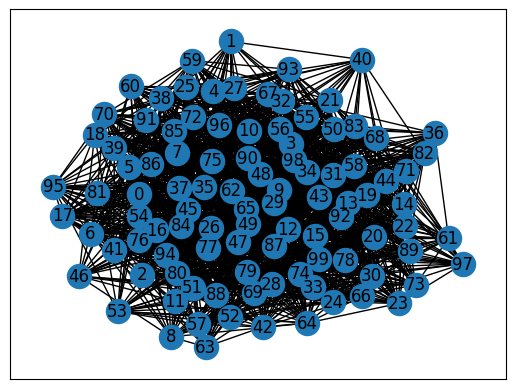

In [55]:
# Definir la probabilidad de creación de aristas
p = 0.3

# Generar un grafo aleatorio usando el modelo NR G(n, p) /  modelo de Gilbert
random_graph_of = nx.gnp_random_graph(len(nodos_of[:100]), p)

nx.draw_networkx(random_graph_of)

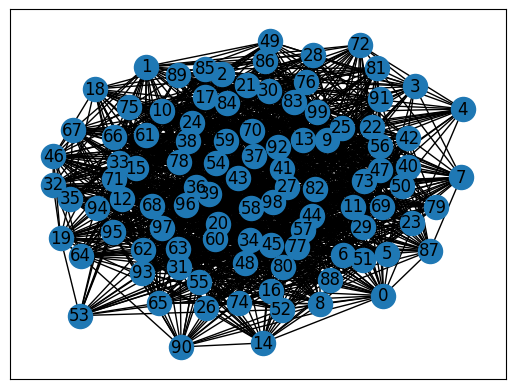

In [66]:
#Utilizando la funcion ER

random_graph_of1 = ER(len(nodos_of[:100]), p)
nx.draw_networkx(random_graph_of1)

In [57]:
len(nodos_of)

1891

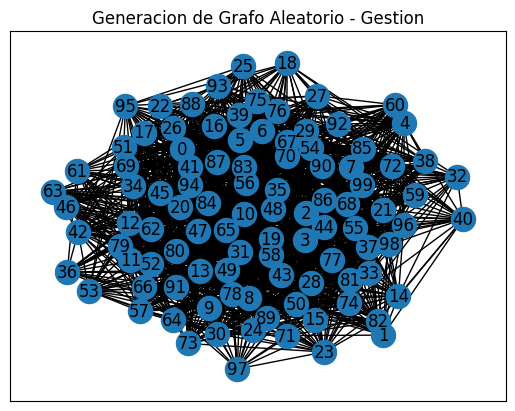

In [58]:
# Visualizamos el grafo aleatorio
pos = nx.spring_layout(random_graph_of)
nx.draw_networkx(random_graph_of, pos)
plt.title("Generacion de Grafo Aleatorio - Gestion")
plt.show()

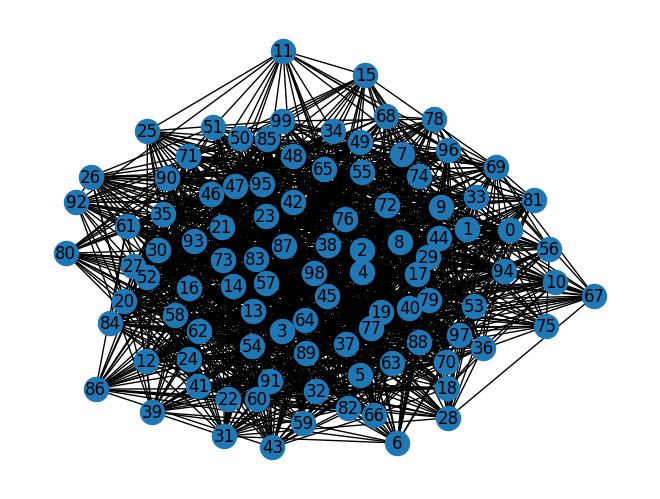

In [81]:
G_ER= nx.erdos_renyi_graph(100,0.3)
nx.draw(G_ER, with_labels=True)
plt.show()

In [60]:
#Comprobar si el grafo ER generado es conectado
nx.is_connected(G_ER)

True

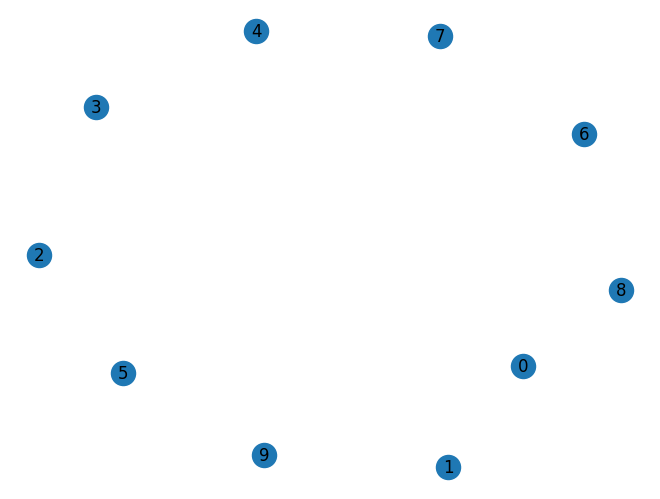

In [61]:
H= nx.erdos_renyi_graph(10,0)
nx.draw(H, with_labels=True)
plt.show()


In [62]:
#Comprobar si el grafo ER generado es conectado
nx.is_connected(H)

False

In [82]:
# Medidas del grafo original
coeficiente_clustering_original = nx.average_clustering(gestion)
longitud_promedio_caminos_original = nx.average_shortest_path_length(gestion)

# Medidas del grafo aleatorio simulado
coeficiente_clustering_simulado = nx.average_clustering(G_ER)
longitud_promedio_caminos_simulado = nx.average_shortest_path_length(G_ER)

print("Medidas globales del grafo original:")
print("Coeficiente de clustering:", coeficiente_clustering_original)
print("Longitud promedio de caminos más cortos:", longitud_promedio_caminos_original)

print("\nMedidas globales del grafo aleatorio simulado:")
print("Coeficiente de clustering:", coeficiente_clustering_simulado)
print("Longitud promedio de caminos más cortos:", longitud_promedio_caminos_simulado)

Medidas globales del grafo original:
Coeficiente de clustering: 0.6768437916146195
Longitud promedio de caminos más cortos: 3.379693843575388

Medidas globales del grafo aleatorio simulado:
Coeficiente de clustering: 0.30008892637914103
Longitud promedio de caminos más cortos: 1.7006060606060607


Clusteting: El coeficiente de clustering de Gestion (0.6768), lo que indica que en el grafo hay una alta densidad de conexiones locales entre los vecinos de cada nodo. Esto sugiere una fuerte tendencia a la formación de grupos densamente interconectados en la red.
El coeficiente de clustering  en el Aleatorio (0.3017). Esto sugiere que en el grafo aleatorio simulado, la densidad de conexiones locales es mucho menor y hay menos agrupaciones densas de nodos.



Longitud promedio de caminos más cortos:

Grafo Gestion: (3.38). Esto indica que, en promedio, se requieren alrededor de 3.38 pasos para llegar de un nodo a otro en el grafo original.
Grafo Aleatorio (1.70). Esto sugiere que en el grafo aleatorio simulado, los nodos están más cerca entre sí en términos de distancia promedio.



En resumen, estos resultados muestran diferencias significativas en las propiedades globales entre el grafo GESTION y el grafo ALEATORIO.
Esto podría indicar que el modelo de Erdős-Rényi por ejemplo puede no ser completamente adecuado para representar la estructura de la red original y que pueden ser necesarios modelos más complejos que tengan en cuenta otras características específicas de la red real.

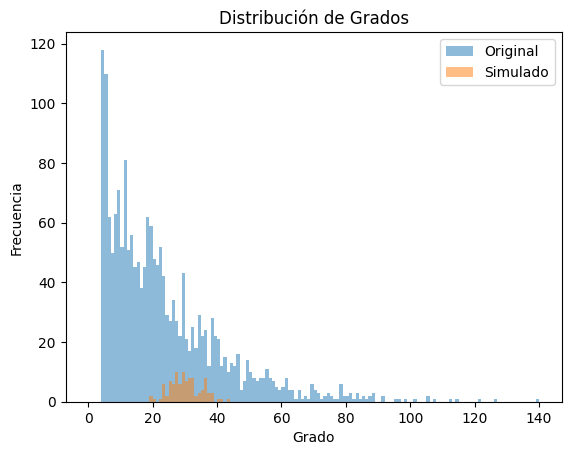

In [79]:
# Distribución de grados del grafo Gestion
grados_original = [d for n, d in gestion.degree()]

# Distribución de grados del grafo aleatorio simulado
grados_simulado = [d for n, d in random_graph_of1.degree()]

plt.hist(grados_original, bins=range(max(grados_original) + 2), alpha=0.5, label='Original')
plt.hist(grados_simulado, bins=range(max(grados_simulado) + 2), alpha=0.5, label='Simulado')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Grados')
plt.legend()
plt.show()

Interpretando esta grafica, una diferencia significativa en la distribución de grados podría indicar que el modelo de Erdős-Rényi por ejemplo no captura completamente las características estructurales del grafo original.

Esto podría sugerir que la estructura del grafo original tiene patrones más complejos o específicos que no están presentes en el grafo aleatorio.

In [80]:
# Componentes conectados del grafo original
componentes_conectados_original = nx.number_connected_components(gestion)

# Componentes conectados del grafo aleatorio simulado
componentes_conectados_simulado = nx.number_connected_components(random_graph_of1)

print("Número de componentes conectados en el grafo original:", componentes_conectados_original)
print("Número de componentes conectados en el grafo aleatorio simulado:", componentes_conectados_simulado)

Número de componentes conectados en el grafo original: 1
Número de componentes conectados en el grafo aleatorio simulado: 1


La observación de un solo componente conectado en ambos grafos proporciona evidencia adicional de que el grafo aleatorio simulado captura de manera efectiva algunas características importantes del grafo principal en términos de su estructura de conectividad.